In [1]:
from time import sleep

from simulation import Warehouse, RobotCoalition

from coalition.dutch_auction import DutchAuction, RobotTaskPair

import matplotlib.pyplot as plt

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data = []

for iteration in range(20):
    w1 = Warehouse(200, 100, visualize=True)
    w1.generate_random_boxes(10)
    w1.generate_random_robots(20)
    r1 = list(w1.robots)[0:2]
    box1 = list(w1.boxes_left)[0]


    cost_weights = [0.2, 0.8]

    temp_pairs_sum = 0

    # counter = 0

    energy_sum = 0

    while len(w1.boxes_left) > 0:
        coalition = DutchAuction(w1.robots, w1.boxes_left,
                                 cost_weights=cost_weights)

        coalition.task_pairs = []

        tasks_pairs = coalition.start_auction()

        #print(
        #   f"############# ZADANIE NUMER: {counter}########################")
        # counter = counter + 1

        for pair in tasks_pairs:
            print(pair)
            energy_sum = energy_sum + pair.sum_cost

        pair_set = [RobotCoalition(set(pair.robot), pair.box)
                    for pair in tasks_pairs]

        temp_pairs_sum = temp_pairs_sum + len(tasks_pairs)

        coal1 = set(pair_set)
        w1.coalitions = coal1

        while len(w1.boxes_done) < temp_pairs_sum:
            w1.step(6)
            sleep(0.01)

    # print(f"FINAL ENERGY: {energy_sum}")
    data.append(energy_sum)

Coalition id: 2
Energy cost: 1.4377966573714747, Cost: 7.0
Summary energy cost: 1.4377966573714747, Cummary cost: 7.0
Box profitability: 7
Task time: 22.368029630238084

Coalition id: 2
Energy cost: 5.581552774581704, Cost: 3.0
Energy cost: 5.716251311000034, Cost: 3.0
Summary energy cost: 11.297804085581738, Cummary cost: 6.0
Box profitability: 6
Task time: 61.76970510276857

Coalition id: 2
Energy cost: 6.109278126117967, Cost: 3.0
Summary energy cost: 6.109278126117967, Cummary cost: 3.0
Box profitability: 3
Task time: 77.628793322321

Coalition id: 2
Energy cost: 6.234075513377475, Cost: 3.0
Energy cost: 7.0772291404825705, Cost: 3.0
Energy cost: 7.275557405454439, Cost: 2.0
Summary energy cost: 20.586862059314484, Cummary cost: 8.0
Box profitability: 8
Task time: 96.04939036888311

Coalition id: 2
Energy cost: 9.768082560515742, Cost: 1.0
Energy cost: 10.69231045251315, Cost: 2.0
Energy cost: 10.799008463814275, Cost: 1.0
Summary energy cost: 31.259401476843166, Cummary cost: 4.0


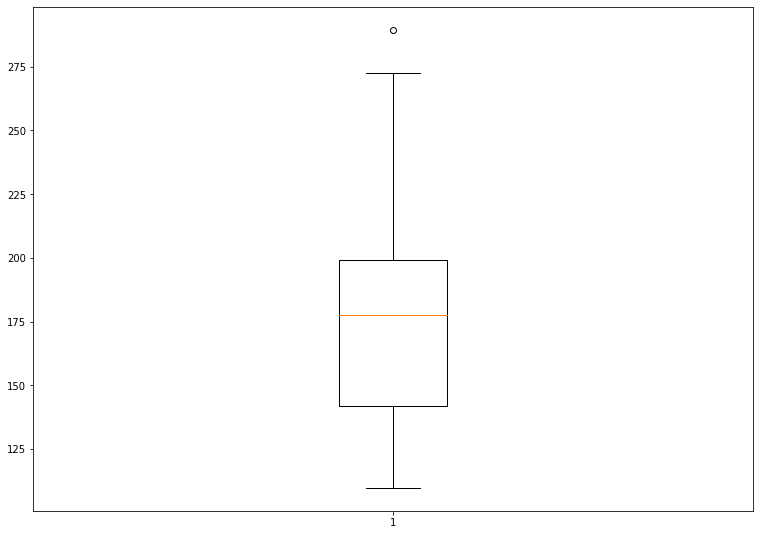

In [4]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()
